In [1]:
library(clusterProfiler)
library(org.Mm.eg.db)
library(enrichplot)
library(msigdbr)
library(ggplot2)



Bioconductor version '3.12' is out-of-date; the current release version '3.18'
  is available with R version '4.3'; see https://bioconductor.org/install

clusterProfiler v3.18.1  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapp

In [2]:
data = read.table("./Overlap/gene_corr_gsea.tsv",sep="\t",header = T)

In [3]:
# genelist = data$gene_name[1:100]

### The positive correlation genes were analyzed by ORA

In [4]:
cutoff = 0.2
genelist = data$gene_name[ data$corr >= cutoff ]
message(length(data$gene_name[ data$corr >= cutoff ]))

318



In [5]:
trans <- bitr(genelist, fromType="SYMBOL",

              toType="ENTREZID", OrgDb="org.Mm.eg.db")

'select()' returned 1:1 mapping between keys and columns



In [6]:
ego <- enrichGO(gene = trans$ENTREZID,
                OrgDb = org.Mm.eg.db,
                ont = "ALL",
                pAdjustMethod = "BH",
                pvalueCutoff = 0.05,
                qvalueCutoff = 1,
                readable = TRUE
               )

In [7]:
# options(repr.plot.height = 15, repr.plot.width = 15)
# x2 = pairwise_termsim(ego,showCategory = 100)
# p = emapplot(x2,showCategory = 100,min_edge = 0.25,layout = "fr")
# p

wrong orderBy parameter; set to default `orderBy = "x"`



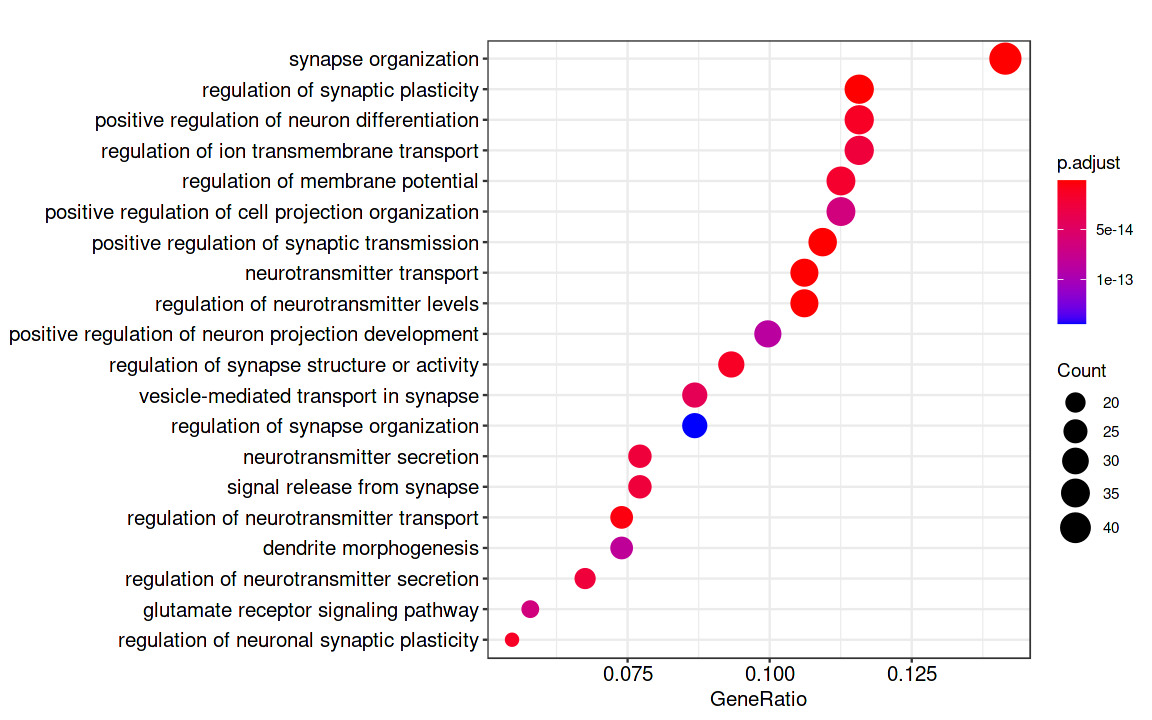

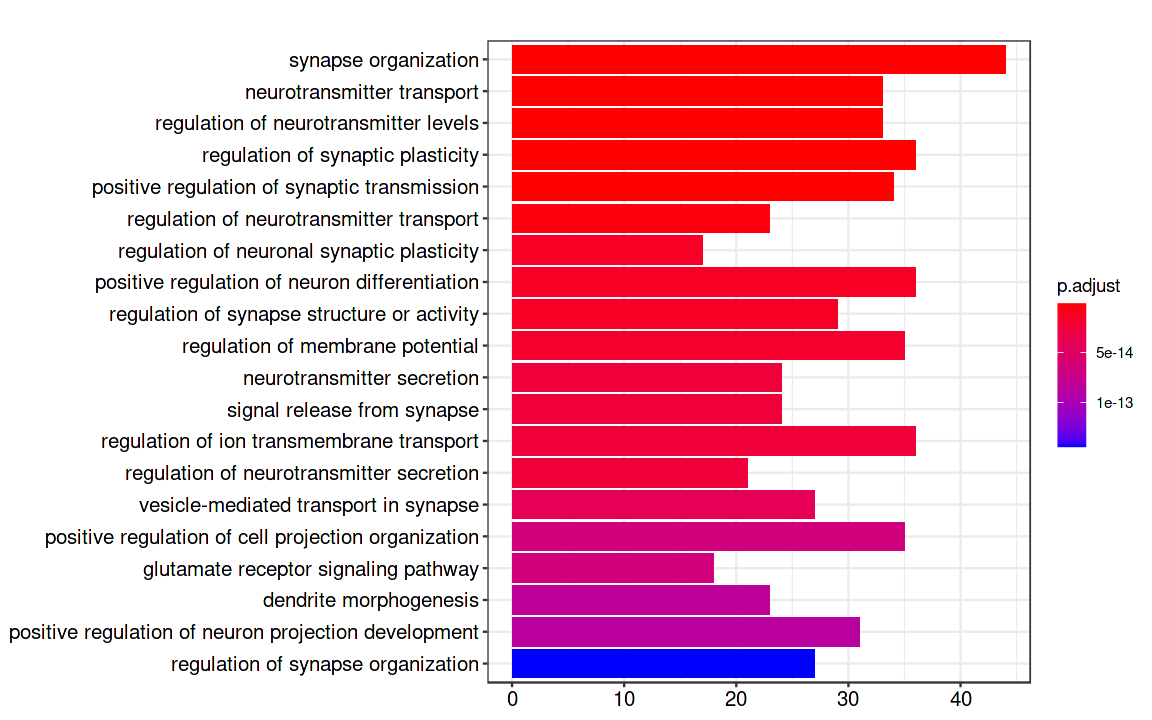

In [8]:
options(repr.plot.height = 5*1.2, repr.plot.width = 8*1.2)
dotplot(ego,showCategory=20)
barplot(ego,showCategory=20)

In [9]:
pdf(file = "./Overlap/posCorr_0.2_ORA.pdf",width = 8*1.2,height = 5*1.2)
dotplot(ego,showCategory=20)
dev.off()

wrong orderBy parameter; set to default `orderBy = "x"`



png 
  2

### The negative correlation genes were analyzed by ORA

In [10]:
cutoff = -0.2
genelist = data$gene_name[ data$corr <= cutoff ]
message(length(data$gene_name[ data$corr <= cutoff ]))

30



In [11]:
trans <- bitr(genelist, fromType="SYMBOL",

              toType="ENTREZID", OrgDb="org.Mm.eg.db")

'select()' returned 1:1 mapping between keys and columns



In [12]:
ego <- enrichGO(gene = trans$ENTREZID,
                OrgDb = org.Mm.eg.db,
                ont = "ALL",
                pAdjustMethod = "BH",
                pvalueCutoff = 0.05,
                qvalueCutoff = 1,
                readable = TRUE
               )

wrong orderBy parameter; set to default `orderBy = "x"`



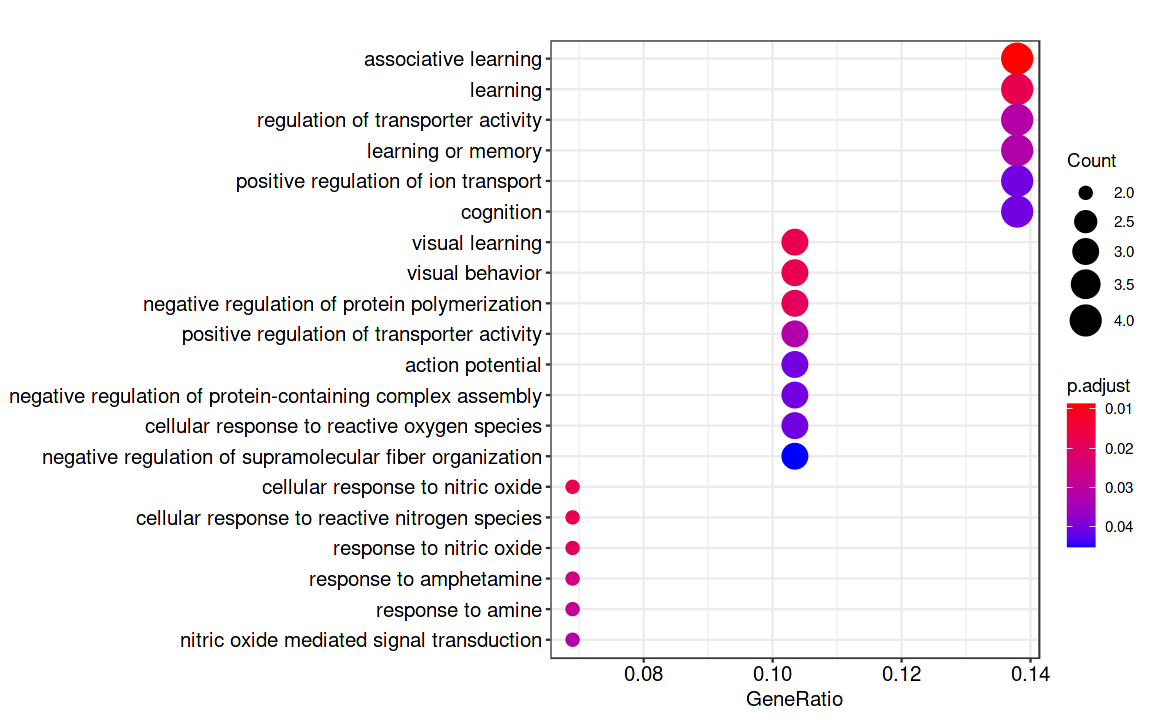

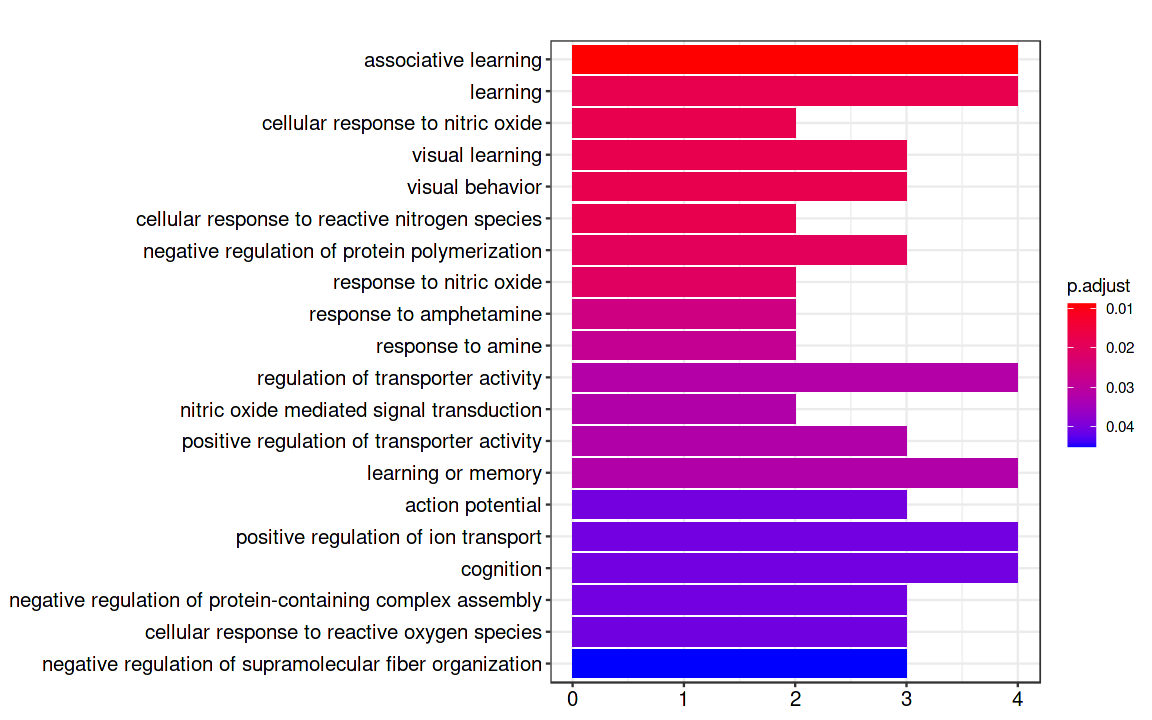

In [13]:
options(repr.plot.height = 5*1.2, repr.plot.width = 8*1.2)
dotplot(ego,showCategory=20)
barplot(ego,showCategory=20)

In [14]:
pdf(file = "./Overlap/negCorr_0.2_ORA.pdf",width = 8*1.2,height = 5*1.2)
dotplot(ego,showCategory=20)
dev.off()

wrong orderBy parameter; set to default `orderBy = "x"`



png 
  2

### The unrelated genes were analyzed by ORA

In [15]:
cutoff = 0.005
genelist = data$gene_name[ abs(data$corr) <= cutoff ]
message(length(data$gene_name[ abs(data$corr) <= cutoff ]))

740



In [16]:
trans <- bitr(genelist, fromType="SYMBOL",

              toType="ENTREZID", OrgDb="org.Mm.eg.db")

'select()' returned 1:1 mapping between keys and columns



In [17]:
ego <- enrichGO(gene = trans$ENTREZID,
                OrgDb = org.Mm.eg.db,
                ont = "ALL",
                pAdjustMethod = "BH",
                pvalueCutoff = 0.05,
                qvalueCutoff = 1,
                readable = TRUE
               )

wrong orderBy parameter; set to default `orderBy = "x"`



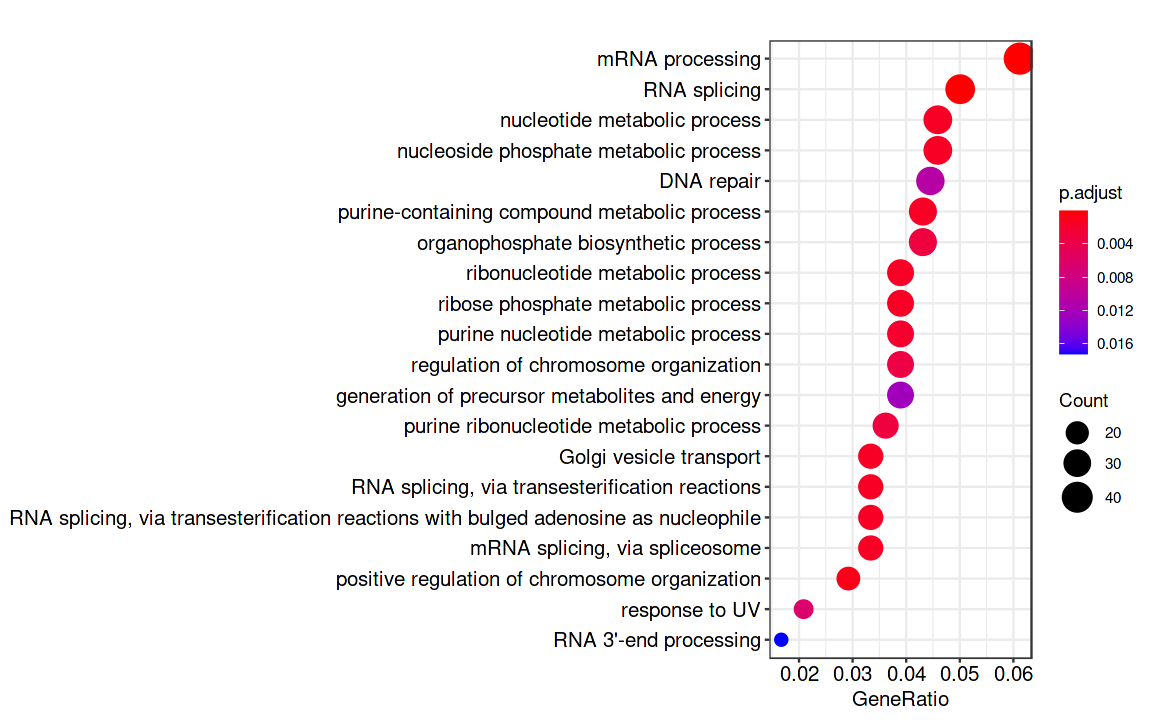

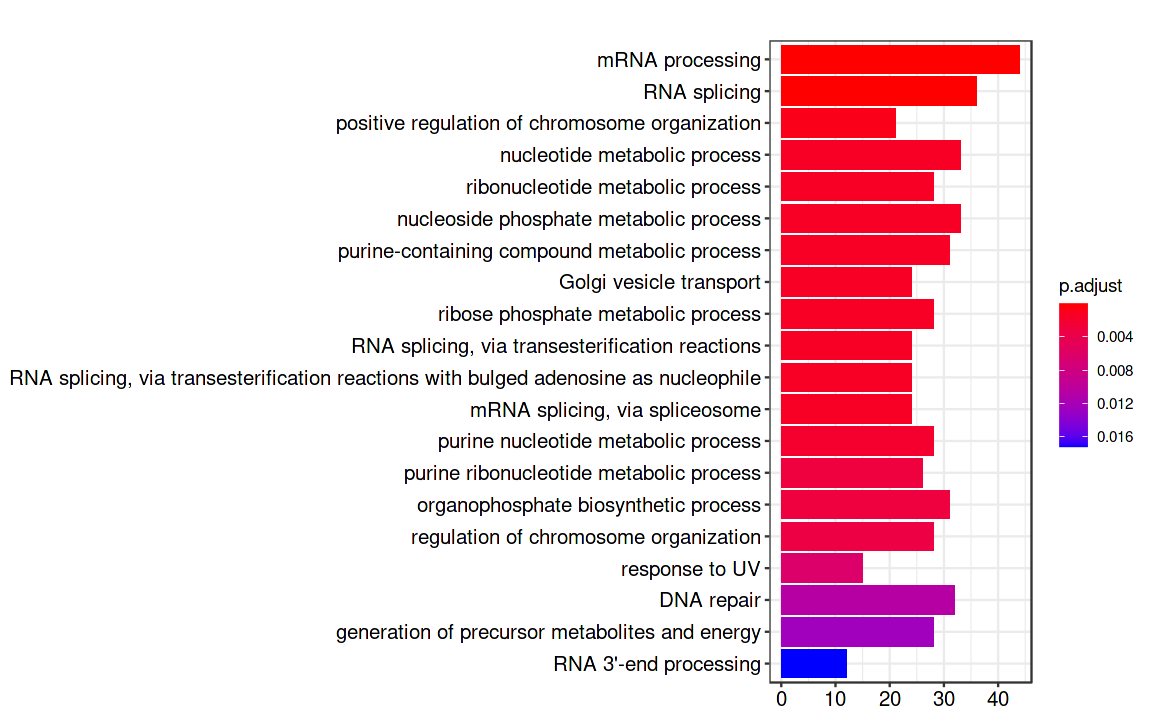

In [18]:
options(repr.plot.height = 5*1.2, repr.plot.width = 8*1.2)
dotplot(ego,showCategory=20)
barplot(ego,showCategory=20)

In [19]:
pdf(file = "./Overlap/noCorr_0.005_ORA.pdf",width = 8*1.2,height = 5*1.2)
dotplot(ego,showCategory=20)
dev.off()

wrong orderBy parameter; set to default `orderBy = "x"`



png 
  2

### GSEA

In [20]:
data = read.table("./Overlap/gene_corr_gsea.tsv",sep="\t",header = T)

In [21]:
FC = data$corr
names(FC) = data$gene_name
FC = sort(FC,decreasing = T)

In [22]:
KEGG = msigdbr(species="Mus musculus",category="C2",subcategory = "CP:KEGG") %>% dplyr::select(gs_name, entrez_gene, gene_symbol)
REACTOME = msigdbr(species="Mus musculus",category="C2",subcategory = "CP:REACTOME") %>% dplyr::select(gs_name, entrez_gene, gene_symbol)
HALLMARK = msigdbr(species="Mus musculus",category="H") %>% dplyr::select(gs_name, entrez_gene, gene_symbol)
GO_BP = msigdbr(species="Mus musculus",category="C5",subcategory = "GO:BP") %>% dplyr::select(gs_name, entrez_gene, gene_symbol)
GO_CC = msigdbr(species="Mus musculus",category="C5",subcategory = "GO:CC") %>% dplyr::select(gs_name, entrez_gene, gene_symbol)
GO_MF = msigdbr(species="Mus musculus",category="C5",subcategory = "GO:MF") %>% dplyr::select(gs_name, entrez_gene, gene_symbol)
GO = msigdbr(species="Mus musculus",category="C5") %>% dplyr::select(gs_name, entrez_gene, gene_symbol)

In [23]:
res_GO = GSEA(geneList = FC,TERM2GENE = GO[,c(1,3)],pvalueCutoff = 1)
res_KEGG = GSEA(geneList = FC,TERM2GENE = KEGG[,c(1,3)],pvalueCutoff = 1)
res_REACTOME = GSEA(geneList = FC,TERM2GENE = REACTOME[,c(1,3)],pvalueCutoff = 1)
res_HALLMARK = GSEA(geneList = FC,TERM2GENE = HALLMARK[,c(1,3)],pvalueCutoff = 1)

preparing geneSet collections...

GSEA analysis...

Warning message in fgseaMultilevel(...):
“There were 65 pathways for which P-values were not calculated properly due to unbalanced (positive and negative) gene-level statistic values. For such pathways pval, padj, NES, log2err are set to NA. You can try to increase the value of the argument nPermSimple (for example set it nPermSimple = 10000)”
Warning message in fgseaMultilevel(...):
“For some of the pathways the P-values were likely overestimated. For such pathways log2err is set to NA.”
Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...

preparing geneSet collections...

GSEA analysis...

Warning message in fgseaMultilevel(...):
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...

pr

wrong orderBy parameter; set to default `orderBy = "x"`

wrong orderBy parameter; set to default `orderBy = "x"`



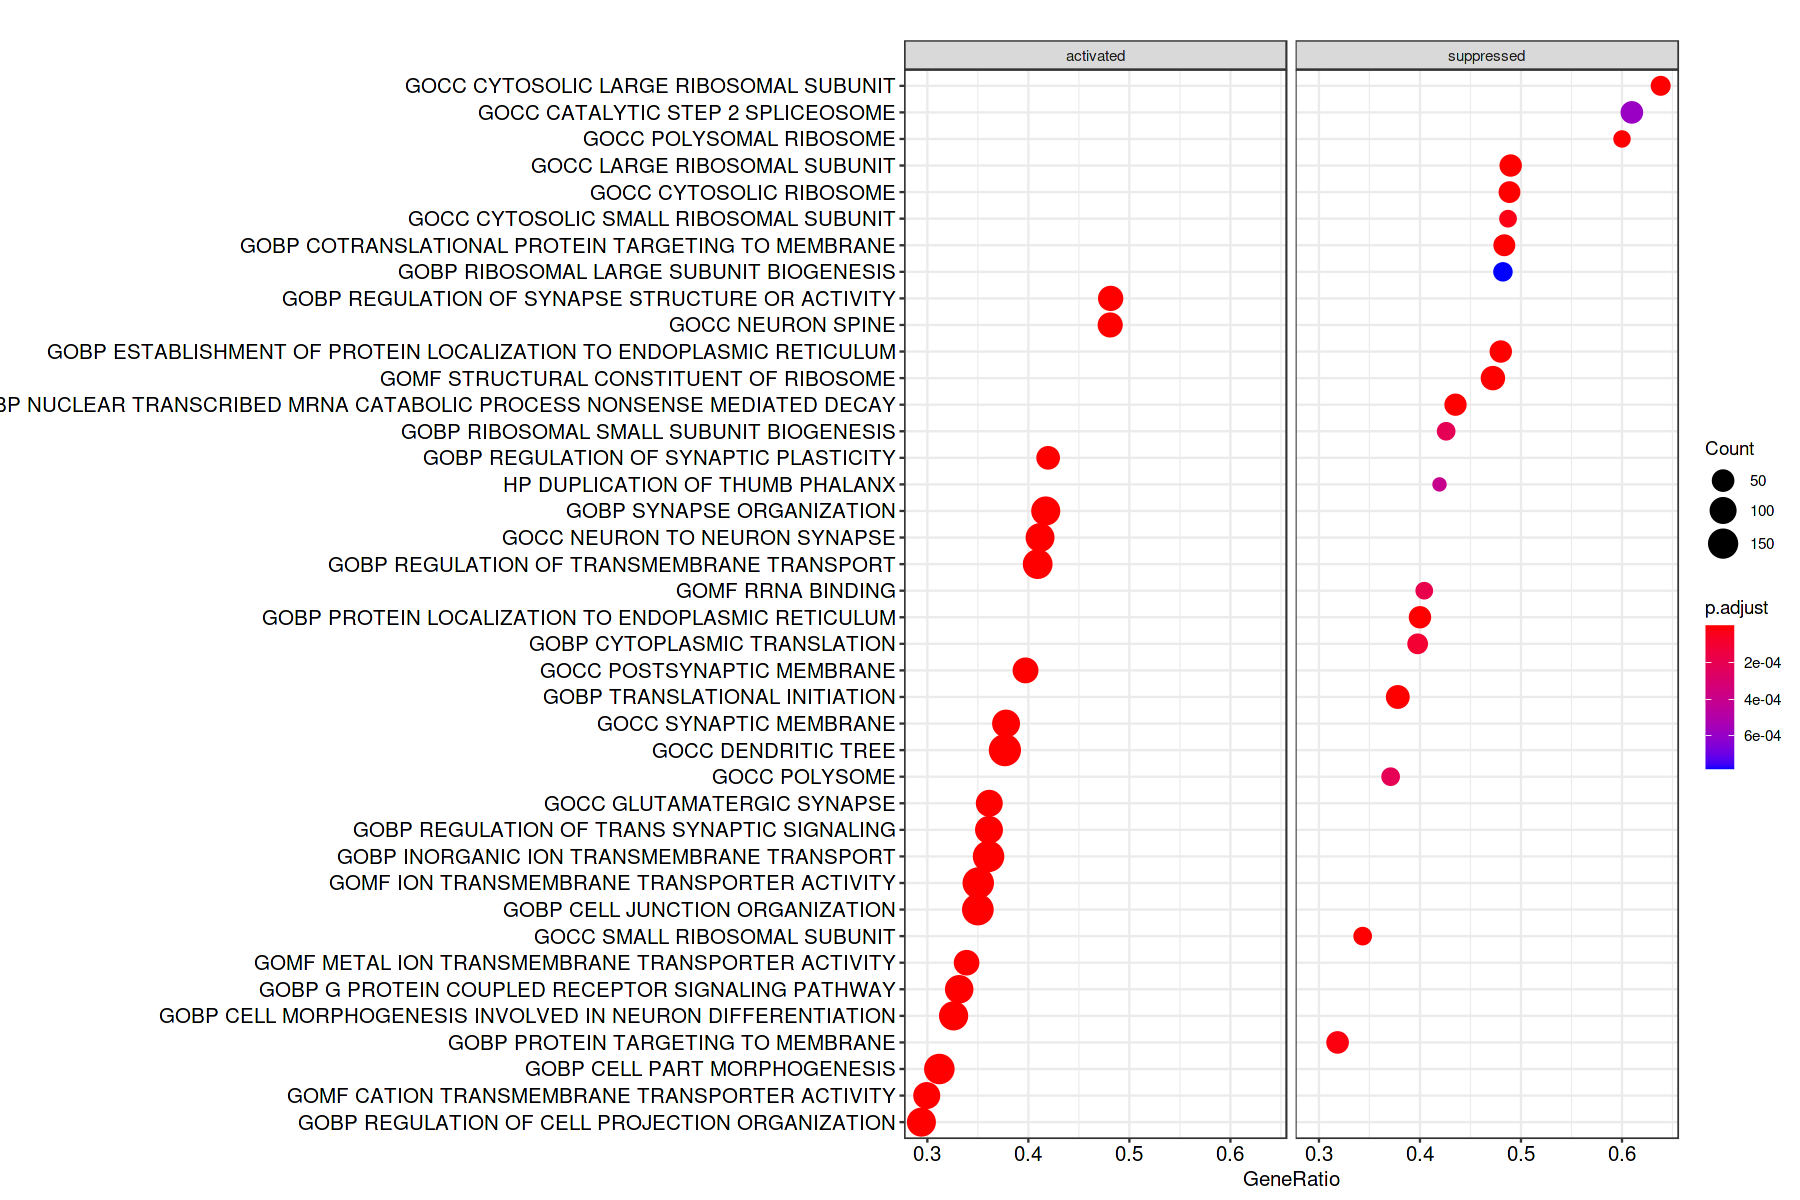

wrong orderBy parameter; set to default `orderBy = "x"`



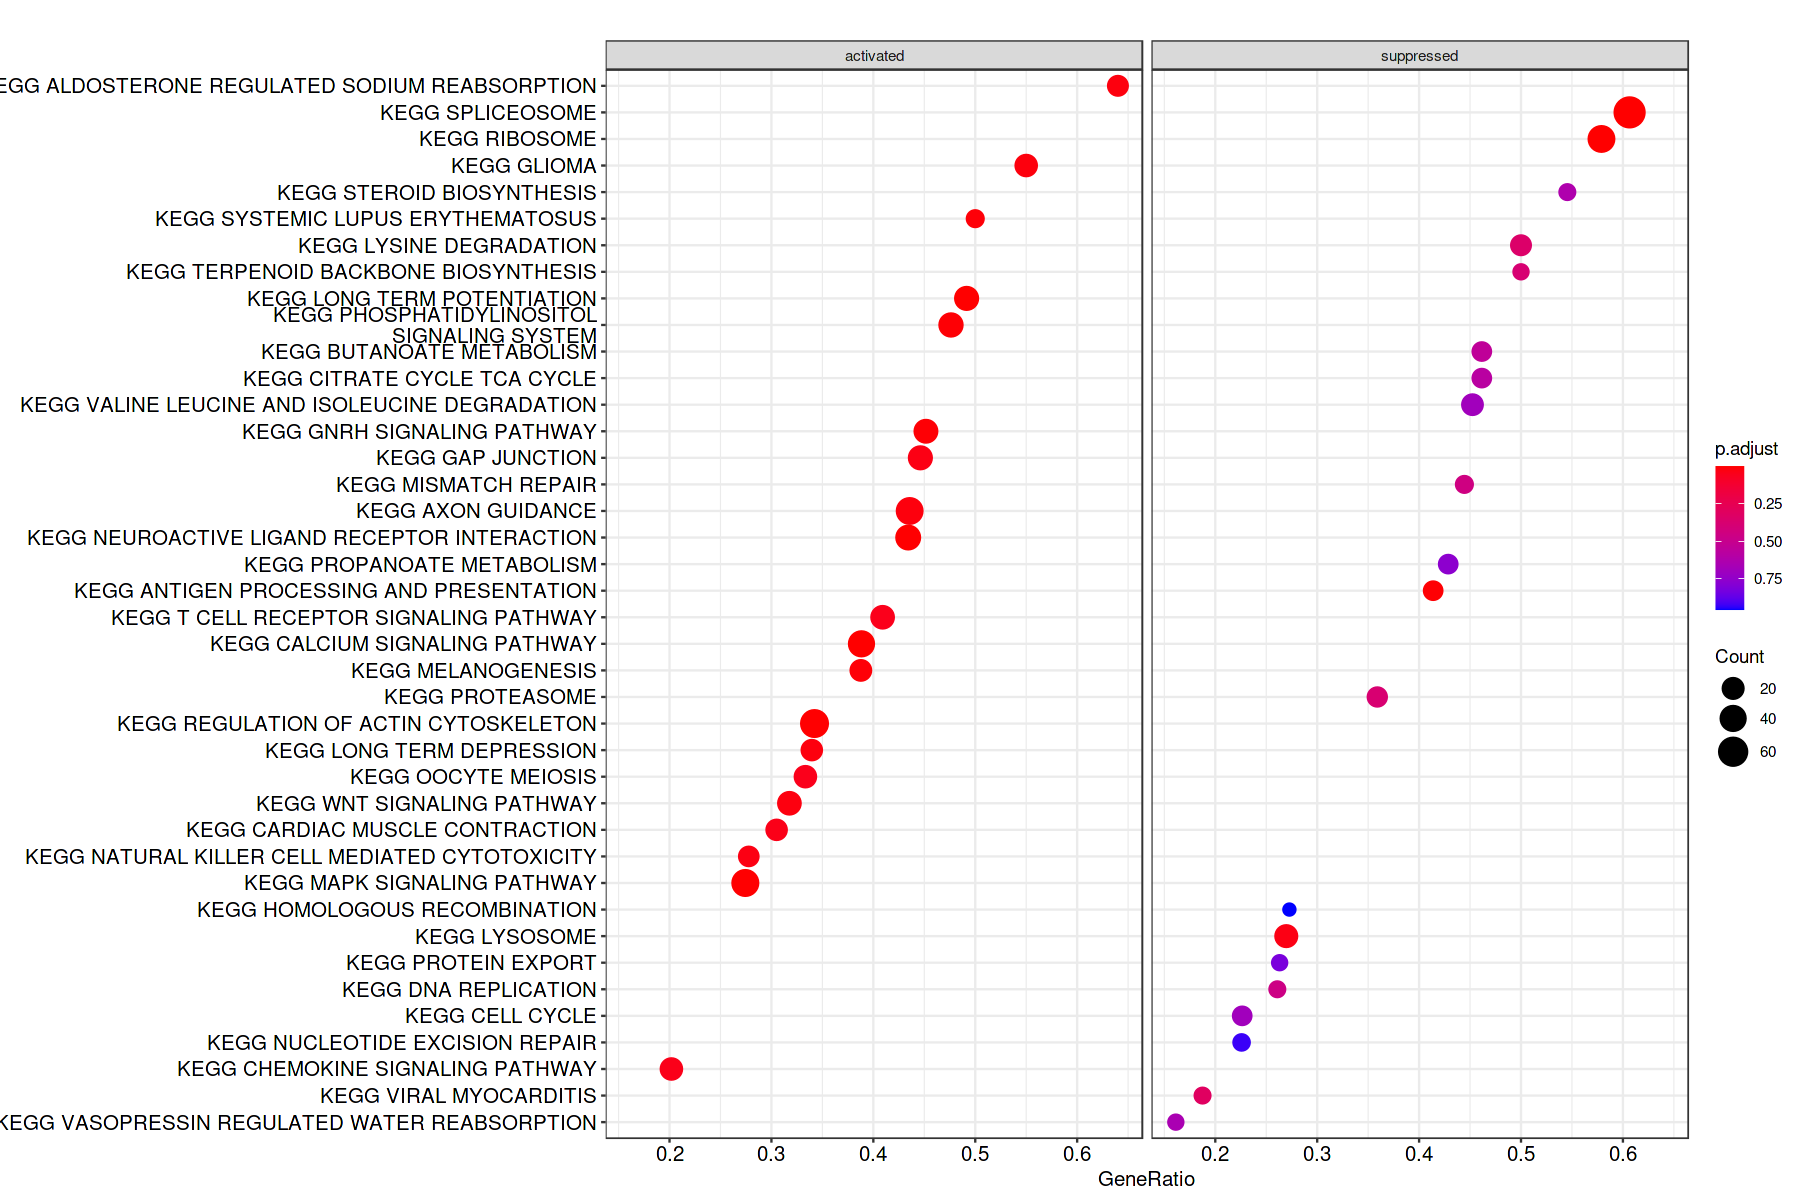

wrong orderBy parameter; set to default `orderBy = "x"`



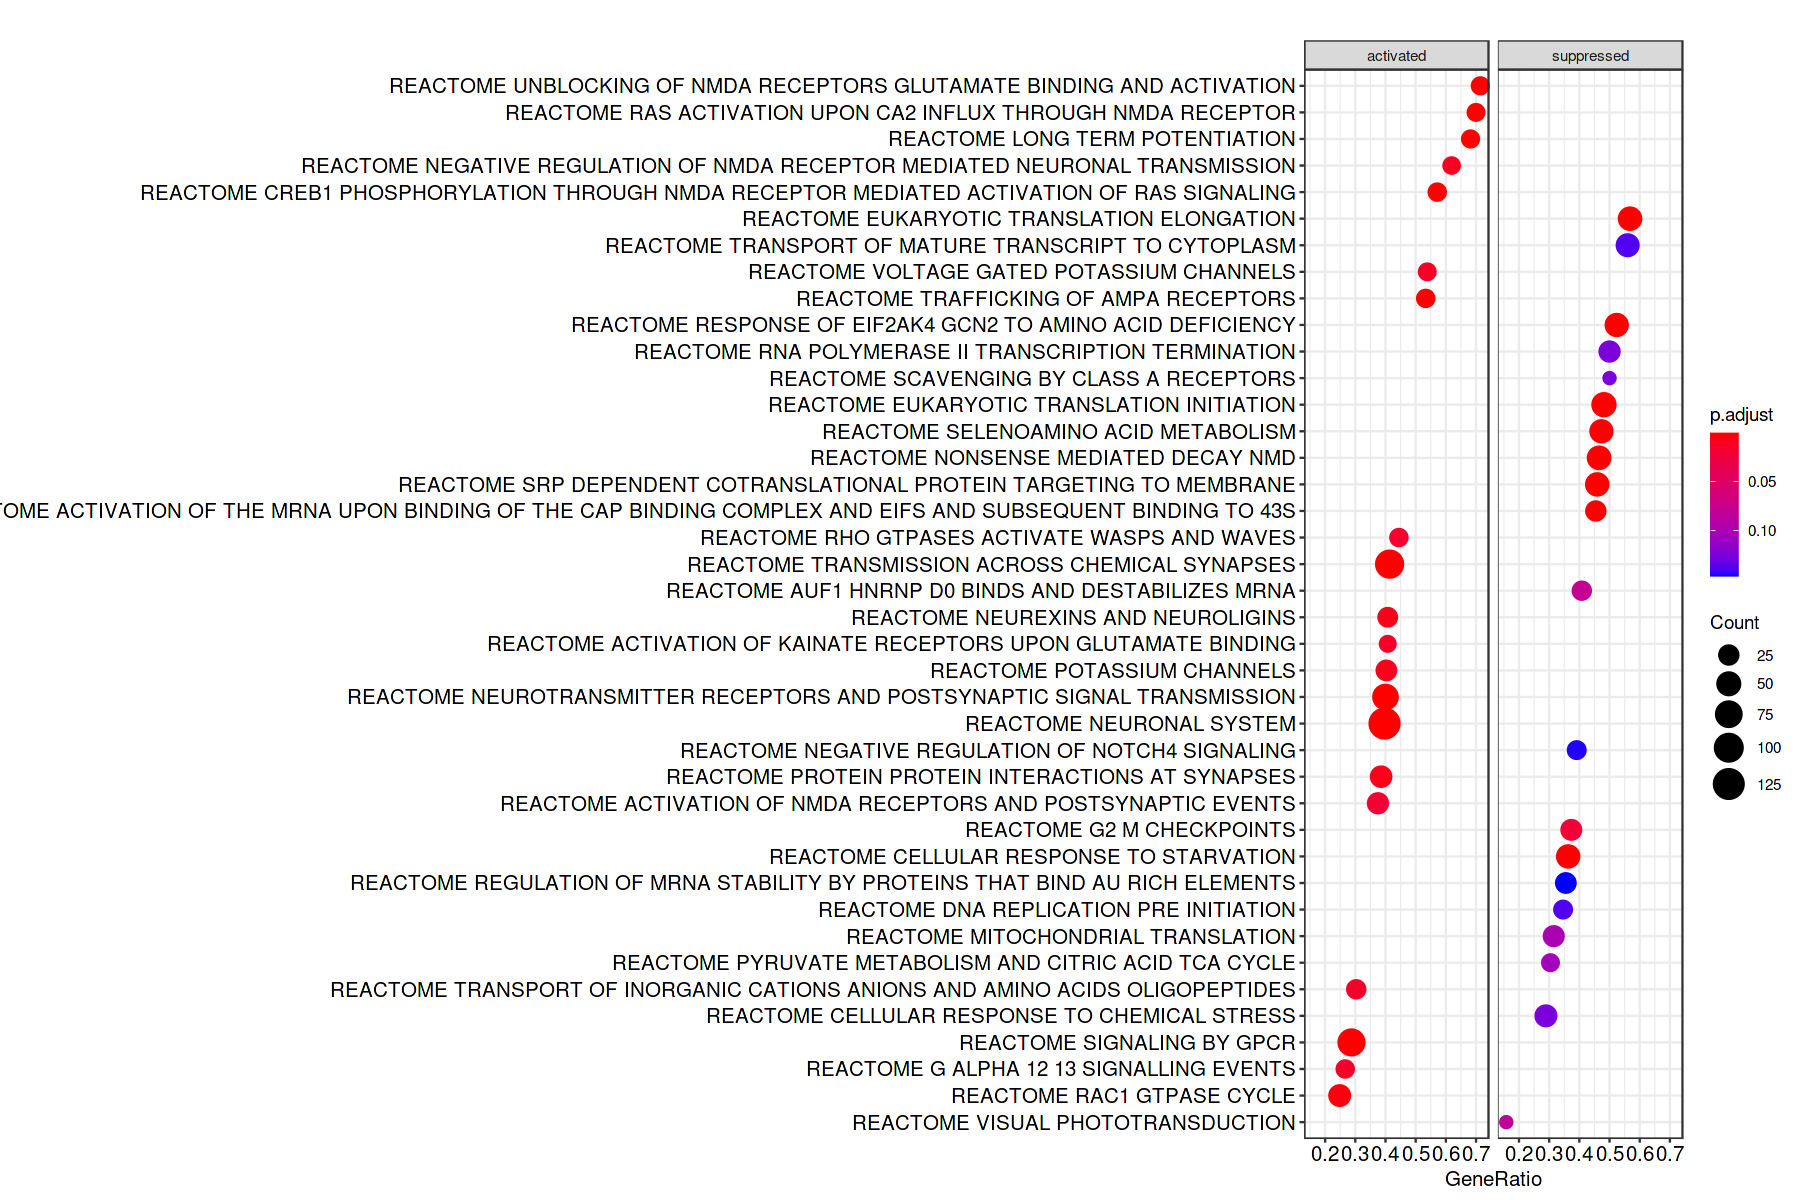

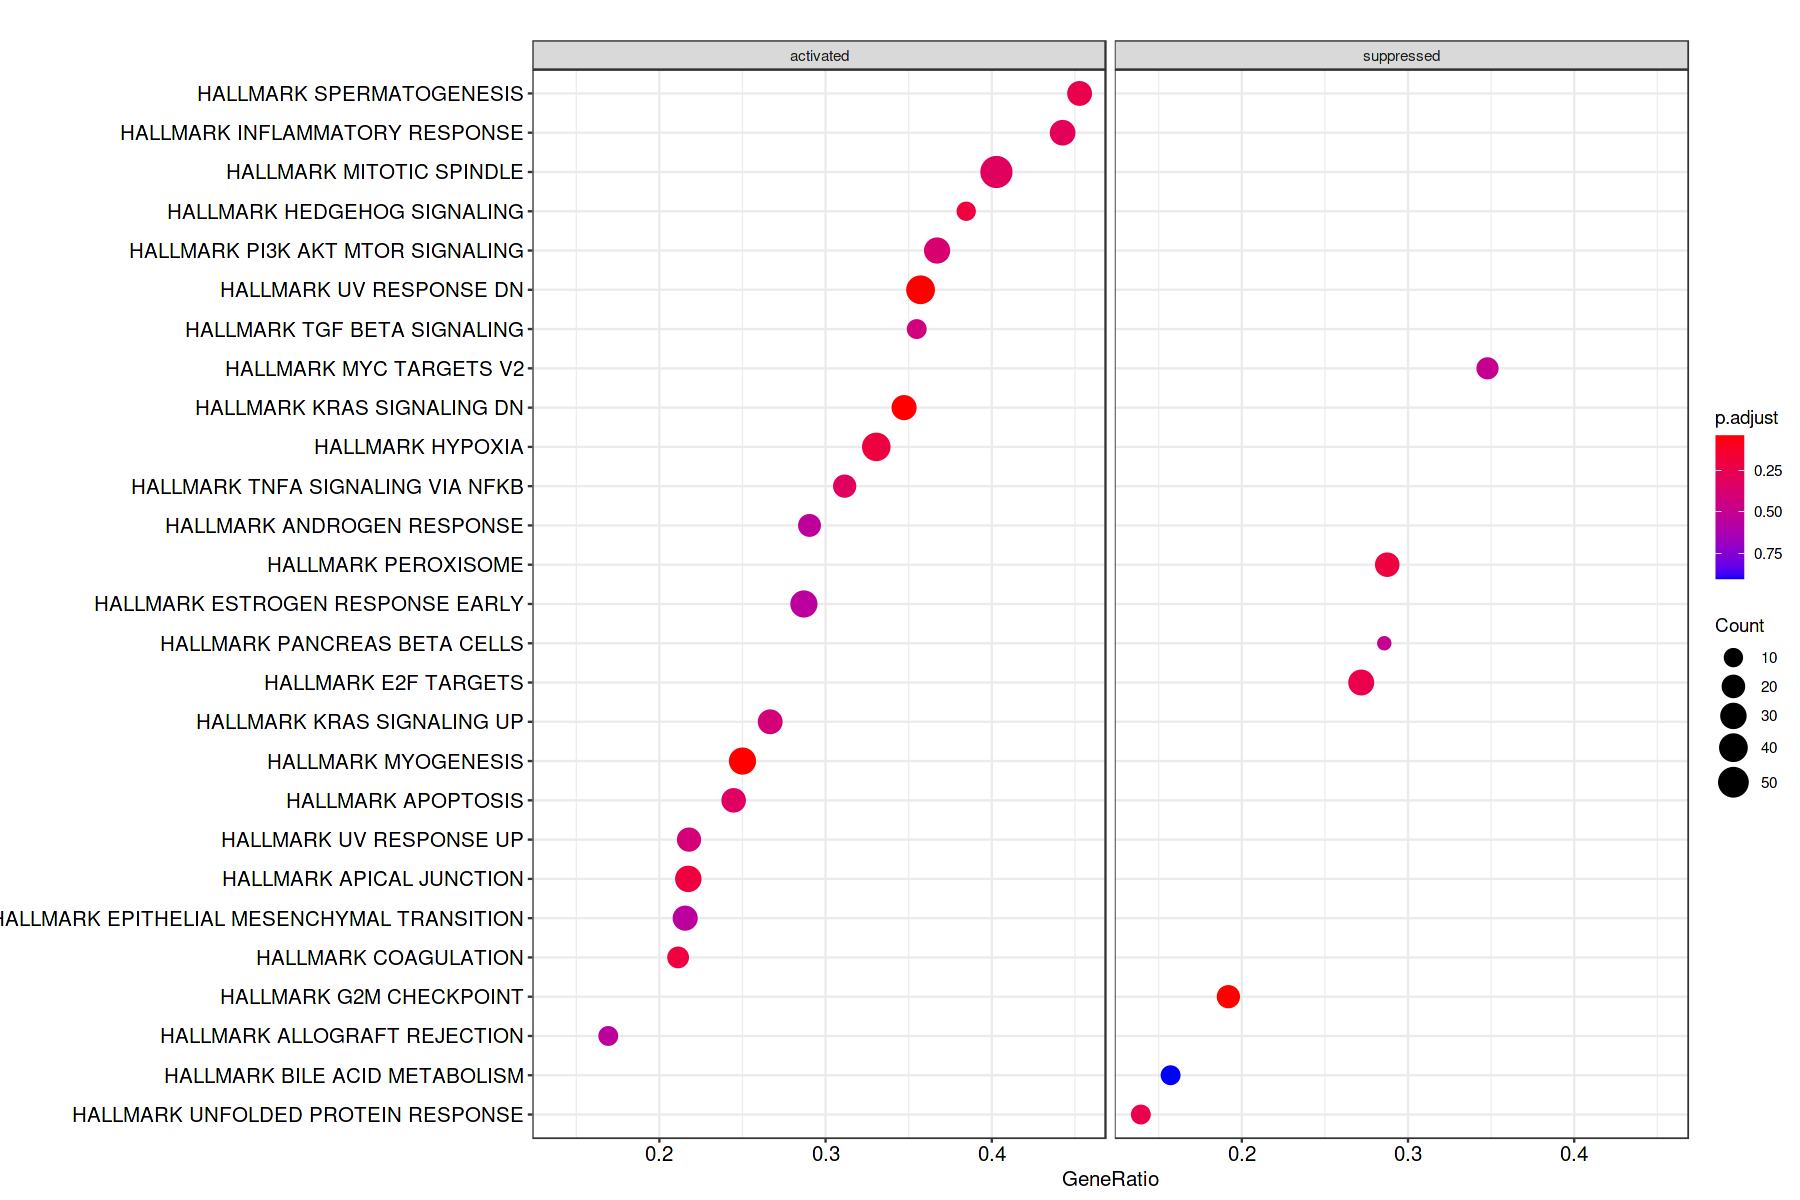

In [24]:
options(repr.plot.height = 10, repr.plot.width = 15)
dotplot(res_GO,showCategory = 20, split = ".sign")+ facet_grid(~.sign)
dotplot(res_KEGG,showCategory = 20, split = ".sign")+ facet_grid(~.sign)
dotplot(res_REACTOME,showCategory = 20, split = ".sign")+ facet_grid(~.sign)
dotplot(res_HALLMARK,showCategory = 20, split = ".sign")+ facet_grid(~.sign)

In [25]:
x2_GO <- pairwise_termsim(res_GO,showCategory = 100)
x2_KEGG <- pairwise_termsim(res_KEGG,showCategory = 100)
x2_REACTOME <- pairwise_termsim(res_REACTOME,showCategory = 100)
x2_HALLMARK <- pairwise_termsim(res_HALLMARK,showCategory = 100)

In [26]:
saveRDS(list(x2_GO,x2_KEGG,x2_REACTOME,x2_HALLMARK),"./Overlap/tree_data.rds")

# Treeplot（change scATAC kernal）

In [1]:
library(enrichplot)
library(stringr)
library(ggplot2)

In [2]:
data = readRDS("./Overlap/tree_data.rds")

In [3]:
x2_GO <- data[[1]]
x2_KEGG <- data[[2]]
x2_REACTOME <- data[[3]]
x2_HALLMARK <- data[[4]]

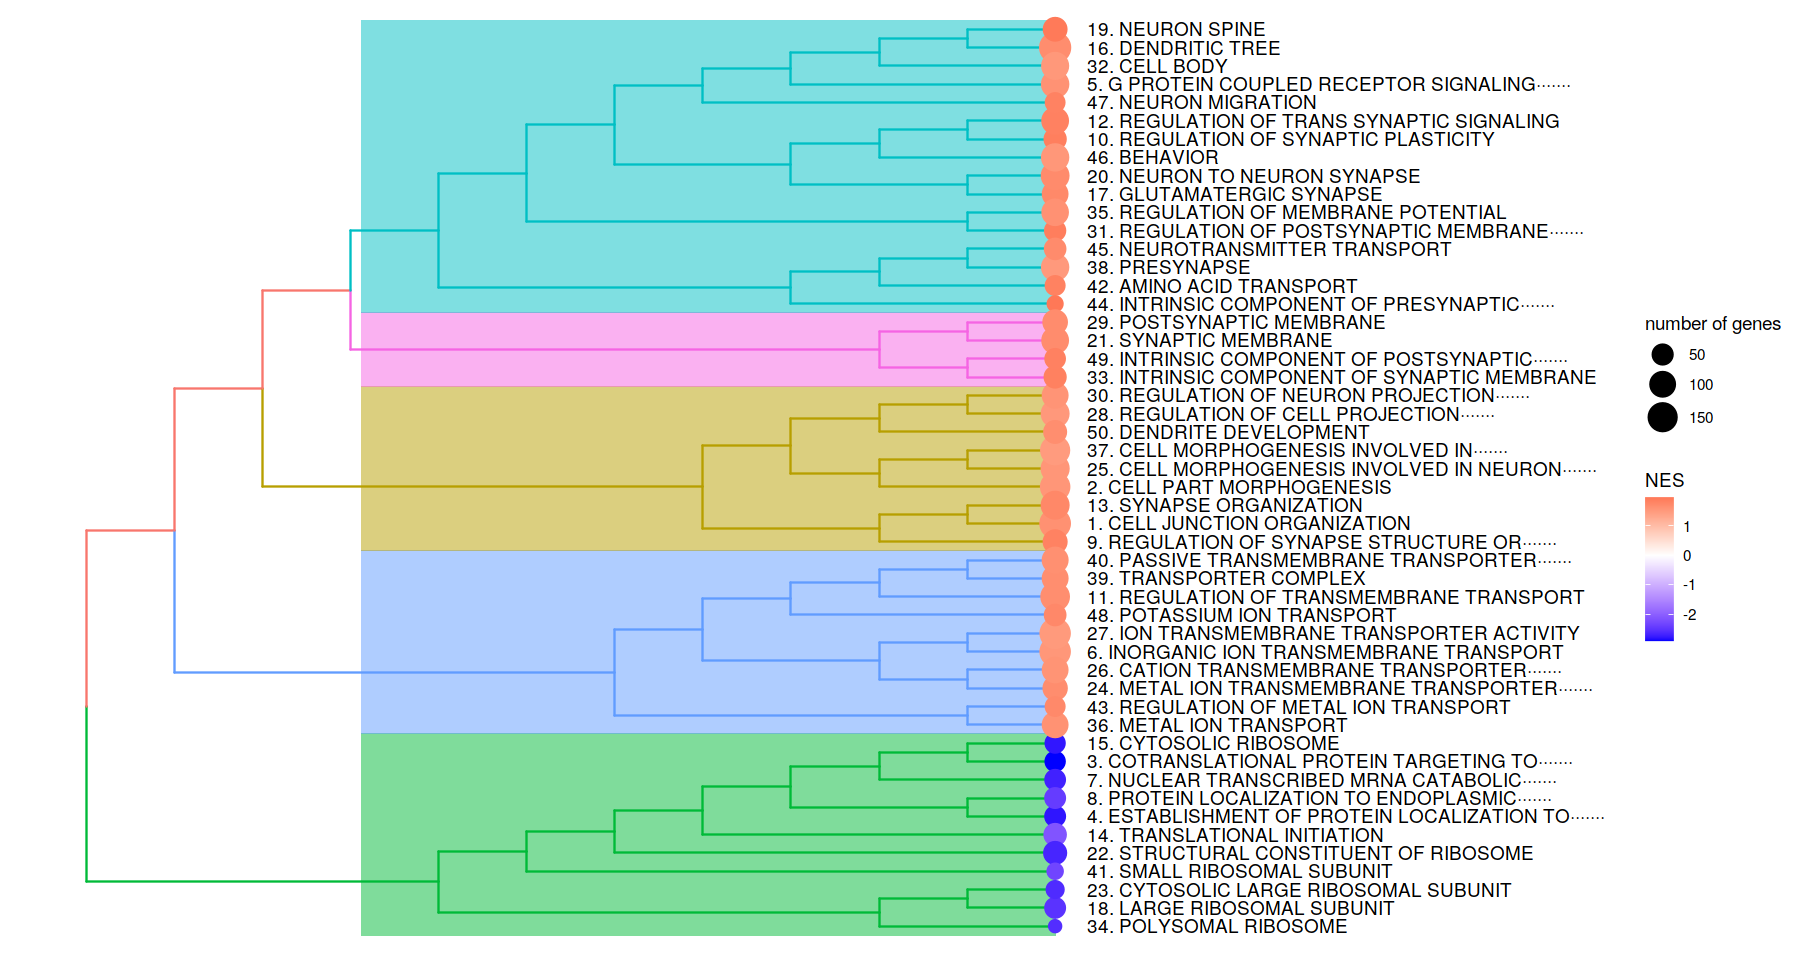

In [4]:
res = x2_GO
p1 <- treeplot(res,showCategory = 50,cluster.params = list(n=5,label_words_n = 5,method = "ward.D2"),offset.params = list(bar_tree = rel(0.2)))
p1$layers[[3]] = NULL
p1$layers[[3]] = NULL
p1$data$NES = res@result[ p1$data$label,"NES"]
p1$layers[[4]]$mapping = aes(size = count,subset=isTip,node = node,color=NES)
p1$scales$scales[[6]] = scale_color_gradient2(low = "blue",mid = "white",high = "red")
ll = p1$data$label
p1$data$label =  str_wrap(sapply(strsplit(as.character(ll),split = "_"),function(x) paste(x[2:length(x)],collapse = " ")),width = 40)
p1$data$label = sapply(strsplit(p1$data$label,split = "\n"),function(x) if(length(x)> 1){paste(x[1],"·······",sep="")}else{x})
p1$data$label = paste(1:length(p1$data$label),p1$data$label,sep = ". ")
p1 <- p1+labs(color = "NES")
                       
                       
options(repr.plot.height = 8, repr.plot.width = 15)
p1

In [5]:
pdf(file = "./Overlap/Treeplot_GSEA_50.pdf",width = 15,height = 8)
p1
dev.off()

png 
  2

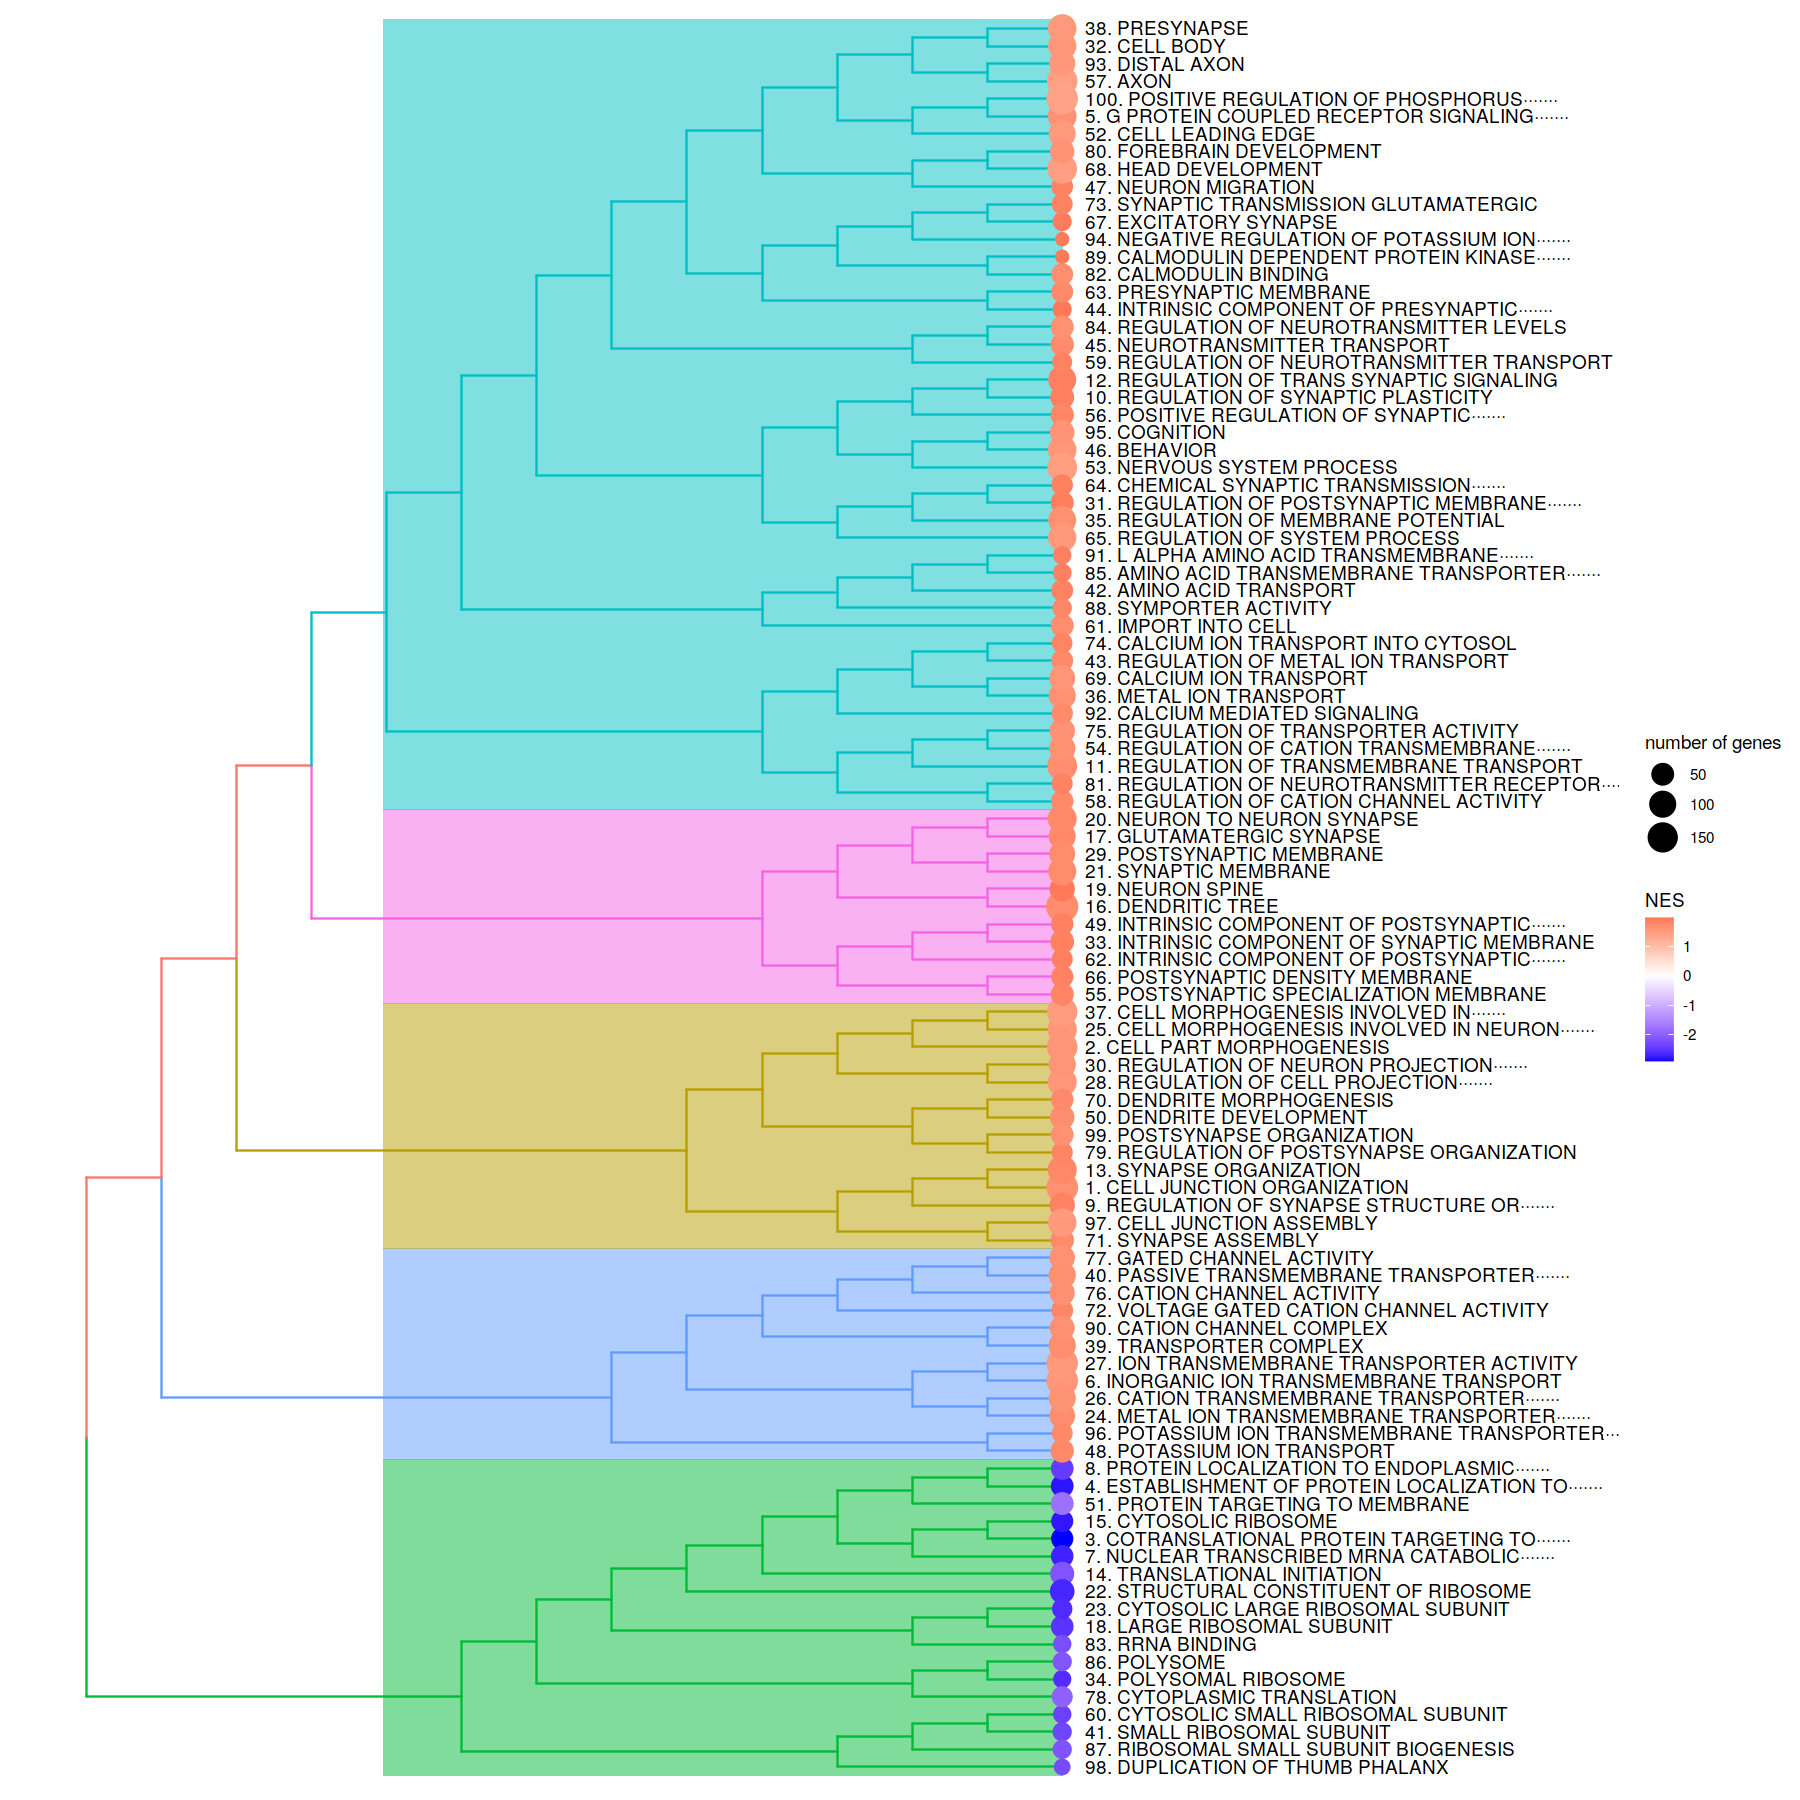

In [6]:
res = x2_GO
p1 <- treeplot(res,showCategory = 100,cluster.params = list(n=5,label_words_n = 5,method = "ward.D2"),offset.params = list(bar_tree = rel(0.2)))
p1$layers[[3]] = NULL
p1$layers[[3]] = NULL
p1$data$NES = res@result[ p1$data$label,"NES"]
p1$layers[[4]]$mapping = aes(size = count,subset=isTip,node = node,color=NES)
p1$scales$scales[[6]] = scale_color_gradient2(low = "blue",mid = "white",high = "red")
ll = p1$data$label
p1$data$label =  str_wrap(sapply(strsplit(as.character(ll),split = "_"),function(x) paste(x[2:length(x)],collapse = " ")),width = 40)
p1$data$label = sapply(strsplit(p1$data$label,split = "\n"),function(x) if(length(x)> 1){paste(x[1],"·······",sep="")}else{x})
p1$data$label = paste(1:length(p1$data$label),p1$data$label,sep = ". ")
p1 <- p1+labs(color = "NES")
                       
                       
options(repr.plot.height = 15, repr.plot.width = 15)
p1

In [7]:
pdf(file = "./Overlap/Treeplot_GSEA_100.pdf",width = 15,height = 15)
p1
dev.off()

png 
  2

In [8]:
write.table(ll,file = "./Overlap/GSEA_pathway_name.txt",sep="\t")